# Analysis Plan for Raw Analyst Ratings Data

In this section, I will perform an exploratory data analysis (EDA) on the `raw_analyst_ratings` dataset, which includes the following columns: `headline`, `url`, `publisher`, `date`, and `stock`. The analysis will focus on the following objectives:

1. **Descriptive Statistics**:
   - Calculate the length of each headline to understand the structure of the data.
   - Count the number of articles contributed by each publisher to identify the most active sources.
   - Analyze publication dates to observe trends over time, including increased news frequency on specific days.

2. **Text Analysis (Topic Modeling)**:
   - Utilize natural language processing techniques to extract common keywords and phrases from the headlines. This will help in identifying significant topics or events mentioned in the articles.

3. **Time Series Analysis**:
   - Examine how the publication frequency varies over time, looking for spikes in article publications that may correlate with specific market events.
   - Analyze the times at which articles are published to determine if there are patterns that could be valuable for traders.

4. **Publisher Analysis**:
   - Identify which publishers contribute most significantly to the news feed and assess any differences in the types of news they report.
   - If applicable, analyze unique domains from publisher names to see if certain organizations are more frequent contributors.

This analysis aims to provide insights into the relationship between analyst ratings and stock performance, enhancing our understanding of market sentiment.

In [1]:
import pandas as pd

analyst_ratings = pd.read_csv('../data/raw_analyst_ratings.csv')

In [2]:
print(analyst_ratings.head())
print(analyst_ratings.info())
print(analyst_ratings.describe())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

*Descriptive Statistics:
Headline Lengths: Calculate the length of each headline.
Articles per Publisher: Count the number of articles contributed by each publisher.
Publication Dates: Analyze publication frequency over time.

In [3]:
analyst_ratings['headline_length'] = analyst_ratings['headline'].apply(len)
articles_per_publisher = analyst_ratings['publisher'].value_counts()
publication_trends = analyst_ratings['date'].value_counts()

*Text Analysis (Topic Modeling):
Use NLP techniques to identify common keywords or phrases from the headlines.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to DataFrame selectively, if needed
# For example, to get top N features
top_n = 20
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in zip(feature_names, range(len(feature_names)))]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
print(words_freq)

[('vs', np.int64(162099)), ('stocks', np.int64(161776)), ('est', np.int64(140604)), ('eps', np.int64(128897)), ('market', np.int64(120558)), ('shares', np.int64(114313)), ('reports', np.int64(108710)), ('update', np.int64(91723)), ('earnings', np.int64(87399)), ('sales', np.int64(79645)), ('benzinga', np.int64(74516)), ('pt', np.int64(73068)), ('week', np.int64(69572)), ('announces', np.int64(66591)), ('price', np.int64(64407)), ('buy', np.int64(64371)), ('mid', np.int64(62263)), ('downgrades', np.int64(61959)), ('trading', np.int64(61182)), ('raises', np.int64(57802))]


*Time Series Analysis:

Plot the number of articles published over time.
Identify any spikes in publication frequency that correlate with market events.

In [8]:
print(analyst_ratings['date'].unique())

['2020-06-05 10:30:54-04:00' '2020-06-03 10:45:20-04:00'
 '2020-05-26 04:30:07-04:00' ... '2017-12-06 07:04:31-04:00'
 '2017-11-15 06:04:52-04:00' '2017-11-14 13:25:57-04:00']


In [10]:
# Headline Length Stats
analyst_ratings['headline_length'] = analyst_ratings['headline'].astype(str).str.len()
print(analyst_ratings['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


<Axes: title={'center': 'Articles Published Over Time'}, xlabel='date'>

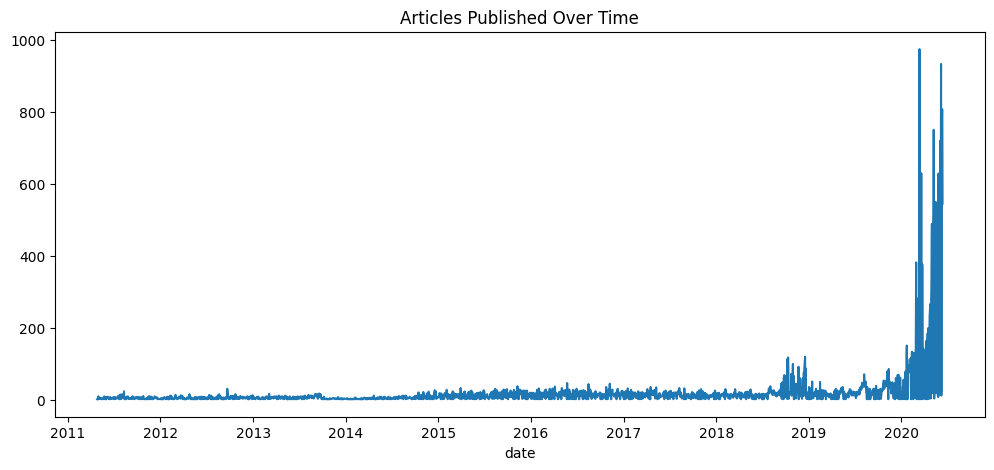

In [11]:
# Trend Over Time
analyst_ratings['date'] = pd.to_datetime(analyst_ratings['date'], errors='coerce')
articles_per_day = analyst_ratings['date'].dt.date.value_counts().sort_index()
articles_per_day.plot(title='Articles Published Over Time', figsize=(12, 5))


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

# One-time download
nltk.download('stopwords')

# Step 1: Sample the data (5000 headlines or fewer)
sampled_texts = analyst_ratings['headline'].dropna().sample(n=5000, random_state=42)

# Step 2: Vectorize with limited vocabulary
vectorizer = CountVectorizer(
    stop_words=stopwords.words('english'),
    max_df=0.95,
    min_df=2,
    max_features=3000  # reduce vocabulary size
)
X = vectorizer.fit_transform(sampled_texts)

# Step 3: Fit LDA model (fewer topics, multi-core)
lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42,
    learning_method='batch',  # or 'online' for larger batches
    n_jobs=-1  # use all available CPU cores
)
lda.fit(X)

# Step 4: Display top words in each topic
for idx, topic in enumerate(lda.components_):
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {idx+1}: {', '.join(top_words)}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arsem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: initiates, 00, update, announces, raises, price, maintains, target, buy, pt
Topic 2: sees, q4, q1, q2, q3, sales, reports, eps, est, vs
Topic 3: mid, pre, new, moving, session, 52, market, earnings, week, stocks
Topic 4: upgrades, update, downgrades, markets, mid, morning, stocks, market, benzinga, top
Topic 5: option, earnings, alert, oil, several, lower, companies, higher, trading, shares


Topic Interpretations
Topic 1: Analyst Actions & Price Targets
Keywords: initiates, announces, raises, maintains, price, target, buy, pt

Interpretation: News about analysts initiating coverage, updating price targets, or issuing buy ratings.

Topic 2: Earnings Reports
Keywords: sees, q1, q2, q3, q4, eps, sales, est, vs, reports

Interpretation: Quarterly earnings releases and expectations vs. actuals.

Topic 3: Market Movement & Technicals
Keywords: mid, pre, market, session, 52, stocks, week, moving, earnings

Interpretation: Intraday/weekly performance updates, possibly referring to 52-week highs/lows.

Topic 4: Upgrades/Downgrades & Market Commentary
Keywords: upgrades, downgrades, update, markets, stocks, benzinga, top

Interpretation: Summary reports on analyst rating changes and broader market recaps.

Topic 5: Trading Alerts & Sectors
Keywords: option, earnings, alert, oil, companies, higher, lower, trading, shares

Interpretation: Trade alerts, oil/energy stocks, and sector-specific trading commentary.



<Axes: title={'center': 'Article Frequency by Hour'}, xlabel='hour'>

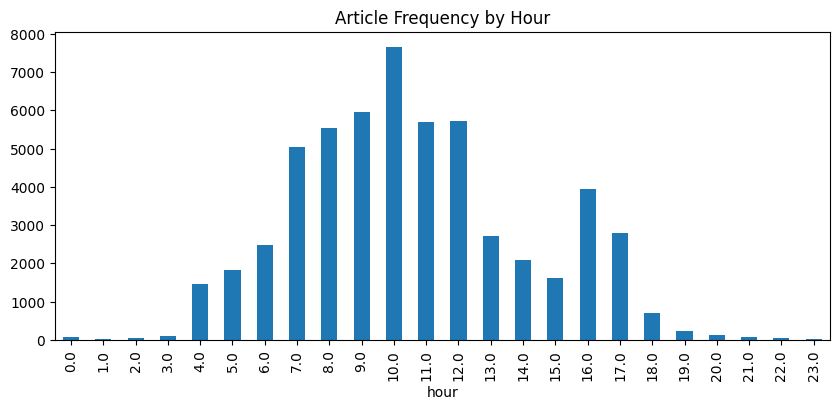

In [15]:
# Publication frequency over time
analyst_ratings.set_index('date', inplace=True)
analyst_ratings['headline'].resample('D').count().plot(title='Publication Frequency Over Time', figsize=(12, 5))

# Time of Day analysis
analyst_ratings['hour'] = analyst_ratings.index.hour
analyst_ratings['hour'].value_counts().sort_index().plot(kind='bar', title='Article Frequency by Hour', figsize=(10, 4))


Publisher Analysis

In [16]:
# Top Publishers
print(analyst_ratings['publisher'].value_counts().head(10))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [17]:
# Most common words per top publisher
top_publishers = analyst_ratings['publisher'].value_counts().head(5).index
for pub in top_publishers:
    pub_text = analyst_ratings[analyst_ratings['publisher'] == pub]['headline'].dropna().str.cat(sep=' ')
    words = pd.Series(pub_text.lower().split())
    print(f"\n{pub}:")
    print(words.value_counts().head(10))



Paul Quintaro:
to         91235
vs         74996
of         72653
eps        56888
reports    55225
in         33297
sales      31046
on         31023
for        28255
from       28230
Name: count, dtype: int64

Lisa Levin:
stocks        68373
for           52323
in            38137
moving        32324
session       32324
top           31264
market        30329
biggest       29090
benzinga's    28342
mid-day       28141
Name: count, dtype: int64

Benzinga Newsdesk:
of         57791
the        51106
to         49415
shares     42366
trading    38800
are        36950
in         32629
up         31786
for        29988
and        28569
Name: count, dtype: int64

Charles Gross:
to        30795
of        25819
for       18821
in        17948
vs        16641
option    15728
alert:    15571
on        13071
@         11479
at         9156
Name: count, dtype: int64

Monica Gerson:
the          30315
top          28151
for          25132
stocks       24765
in           19197
earnings     18938
s

In [18]:
# Email domain extraction (if publisher is an email)
analyst_ratings['domain'] = analyst_ratings['publisher'].str.extract(r'@([\w\.-]+)')
print(analyst_ratings['domain'].value_counts().head(10))


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


| Publisher         | Article Count |
| ----------------- | ------------- |
| Paul Quintaro     | 228,373       |
| Lisa Levin        | 186,979       |
| Benzinga Newsdesk | 150,484       |
| Charles Gross     | 96,732        |
| Monica Gerson     | 82,380        |
| Eddie Staley      | 57,254        |
| Hal Lindon        | 49,047        |
| ETF Professor     | 28,489        |
| Juan Lopez        | 28,438        |
| Benzinga Staff    | 28,114        |


<Axes: title={'center': 'Top 10 Publishers by Article Count'}, ylabel='publisher'>

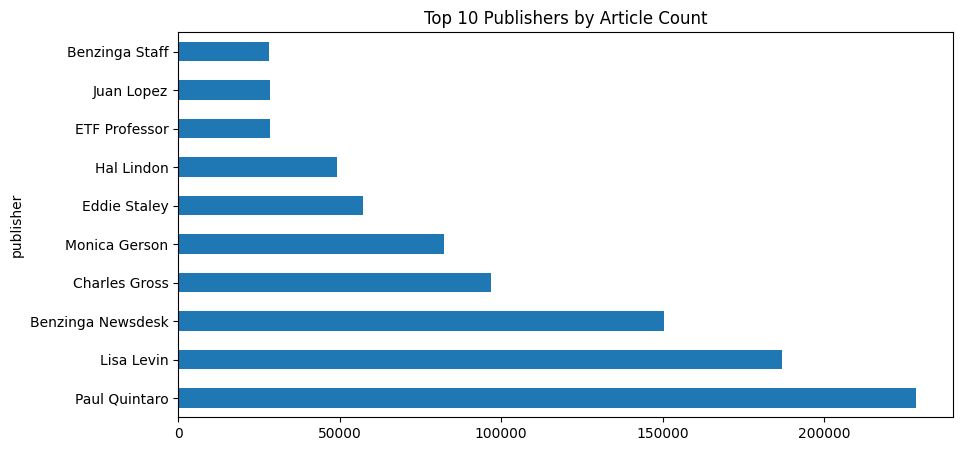

In [19]:
top_publishers = analyst_ratings['publisher'].value_counts().head(10)
top_publishers.plot(kind='barh', figsize=(10, 5), title='Top 10 Publishers by Article Count')
